In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#df = pd.read_csv('data.csv')
df = pd.read_csv('/content/gdrive/MyDrive/M156 Final Project/Testing_Adding_More_Features/data.csv')

In [ ]:
y_df = df.pop('PTS_self')
df.pop('GAME_DATE_EST')
df.pop('GAME_ID')
df.pop('SELF_NICKNAME')
df.pop('SELF_ABBREV')
df.pop('OPP_NICKNAME')
df.pop('OPP_ABBREV')
df.pop('PTS_opp')
df.pop('WIN?')

df

,FG_PCT_self,FT_PCT_self,FG3_PCT_self,AST_self,REB_self,FG_PCT_opp,FT_PCT_opp,FG3_PCT_opp,AST_opp,REB_opp,HOME?
0,0.642,0.880,0.364,30,50,0.452,0.684,0.413,32,30,1
1,0.539,0.714,0.545,34,48,0.447,0.615,0.348,25,43,1
2,0.543,0.706,0.500,39,48,0.443,0.781,0.400,27,41,1
3,0.461,0.750,0.370,24,34,0.517,0.792,0.553,29,50,1
4,0.382,0.630,0.319,27,45,0.545,1.000,0.375,34,56,1
...,...,...,...,...,...,...,...,...,...,...,...
2587,0.317,0.600,0.233,14,47,0.465,0.760,0.353,22,60,0
2588,0.420,0.765,0.348,32,47,0.446,0.773,0.421,21,53,0
2589,0.467,0.846,0.314,24,38,0.473,0.684,0.340,22,51,0
2590,0.430,0.621,0.270,20,45,0.432,0.760,0.333,26,52,0


In [ ]:
#dfexp = df.
corr_matrix = df.corr()
print(corr_matrix)

              FG_PCT_self  FT_PCT_self  FG3_PCT_self  AST_self  REB_self  \
FG_PCT_self      1.000000     0.050586      0.570273  0.592769 -0.159112   
FT_PCT_self      0.050586     1.000000      0.045464  0.029272 -0.049566   
FG3_PCT_self     0.570273     0.045464      1.000000  0.441436 -0.093203   
AST_self         0.592769     0.029272      0.441436  1.000000  0.034601   
REB_self        -0.159112    -0.049566     -0.093203  0.034601  1.000000   
FG_PCT_opp       0.000887     0.007873     -0.027716 -0.033731 -0.549642   
FT_PCT_opp       0.007873     0.044352      0.002974 -0.015623 -0.165882   
FG3_PCT_opp     -0.027716     0.002974     -0.069009 -0.022681 -0.294159   
AST_opp         -0.033731    -0.015623     -0.022681 -0.010239 -0.231033   
REB_opp         -0.549642    -0.165882     -0.294159 -0.231033 -0.015007   
HOME?            0.062771    -0.001255      0.025837  0.087548  0.047498   

              FG_PCT_opp  FT_PCT_opp  FG3_PCT_opp   AST_opp   REB_opp  \
FG_PCT_self   

In [ ]:
y = y_df.to_numpy()
X = df.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 4).fit(X_train, y_train)

print('Linear Regresssion:\n')
print('coefficients: ' + str(reg.coef_))
print('intercept: ' + str(reg.intercept_))
print('score: ' + str(reg.score(X_test, y_test)))
print('\n')

print('Bayesian Ridge Regresssion:\n')
print('coefficients: ' + str(bayes.coef_))
print('intercept: ' + str(bayes.intercept_))
print('score: ' + str(bayes.score(X_test, y_test)))
print('\n')

print('Random Forest Regresssion:\n')
print('score: ' + str(rfr.score(X_test, y_test)))
print('\n')

prediction_reg = []
actual_reg = []

prediction_bayes = []
actual_bayes = []

prediction_rfr = []
actual_rfr = []

for i in range(len(y_test)):
  prediction_reg.append(reg.predict([X_test[i]])[0])
  actual_reg.append(y_test[i])

  prediction_bayes.append(bayes.predict([X_test[i]])[0])
  actual_bayes.append(y_test[i])

  prediction_rfr.append(rfr.predict([X_test[i]])[0])
  actual_rfr.append(y_test[i])

Linear Regresssion:

coefficients: [ 1.64185449e+02  1.99955878e+01  3.26257200e+01  3.82021949e-01
  8.31116845e-01  7.52954602e+01  4.92838120e+00  1.63804019e+00
 -1.33345909e-02  4.02475363e-01  3.15774504e-01]
intercept: -95.45790358912915
score: 0.7834529577890126


Bayesian Ridge Regresssion:

coefficients: [ 1.63239241e+02  1.99467861e+01  3.27143043e+01  3.86124101e-01
  8.27372421e-01  7.46760914e+01  4.89743419e+00  1.68213133e+00
 -1.08821819e-02  3.98060339e-01  3.16114390e-01]
intercept: -94.5186431424106
score: 0.7833977920711648


Random Forest Regresssion:

score: 0.6440761665490948




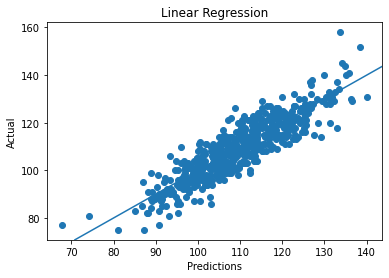

MSE: 34.28193052412583
Mean Absolute Error: 4.63294749990102




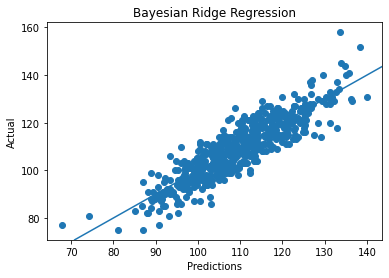

MSE: 34.290663902736156
Mean Absolute Error: 4.632773772138595




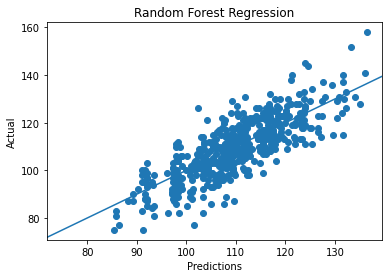

MSE: 56.34690737708606
Mean Absolute Error: 5.941733592579449


In [ ]:
plt.scatter(prediction_reg, actual_reg)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Linear Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_reg, prediction_reg)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_reg, prediction_reg)))
print("\n")

plt.scatter(prediction_bayes, actual_bayes)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Bayesian Ridge Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_bayes, prediction_bayes)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_bayes, prediction_bayes)))
print("\n")

plt.scatter(prediction_rfr, actual_rfr)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Random Forest Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_rfr, prediction_rfr)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_rfr, prediction_rfr)))

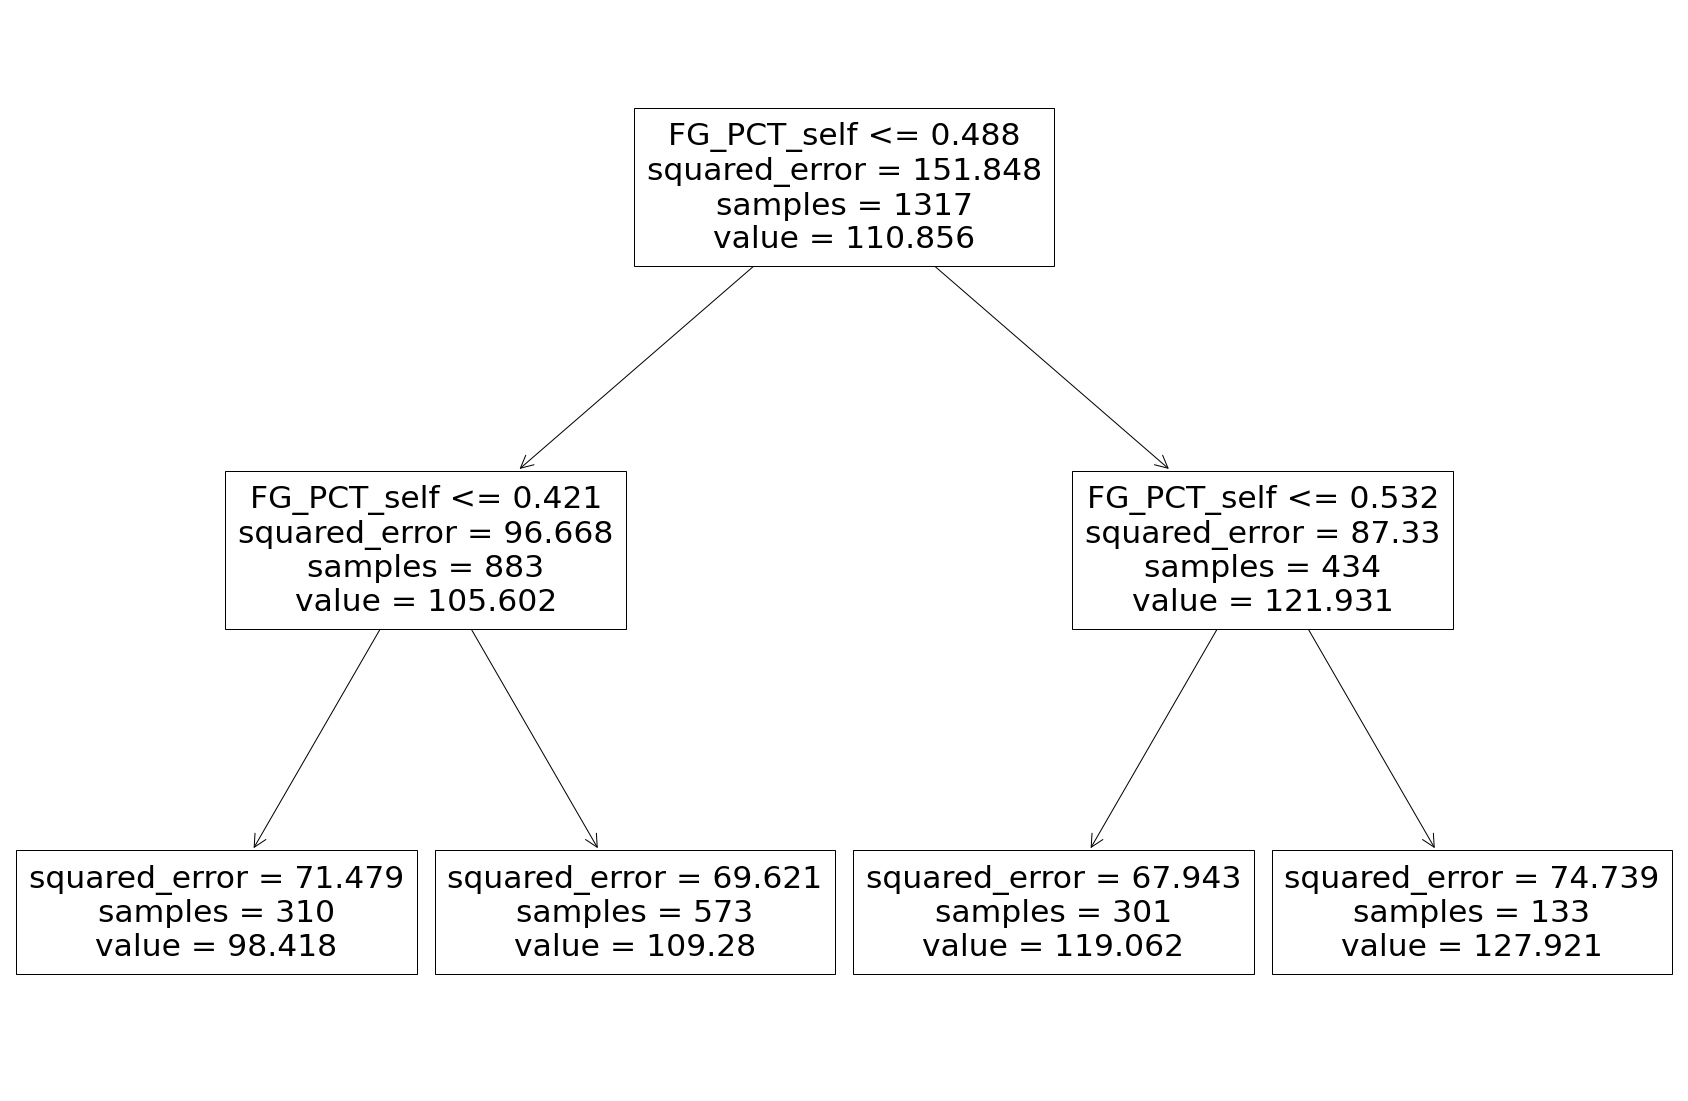

In [ ]:
from sklearn import tree

rfr = RandomForestRegressor(n_estimators = 20, max_depth = 2).fit(X_train, y_train)

fig = plt.figure(figsize=(30, 20))
tree.plot_tree(rfr.estimators_[0], feature_names=['FG_PCT_self',	'FT_PCT_self',	'FG3_PCT_self',	'AST_self',	'REB_self', 
                                                  'FG_PCT_opp',	'FT_PCT_opp',	'FG3_PCT_opp',	'AST_opp',	'REB_opp', 'HOME?'])
plt.show()

In [ ]:
full_df = pd.read_csv('data.csv')

In [ ]:
# predict points based off of end of game stats
def predictboolendofgame(date, home_team, away_team, verbose):
  home = full_df.loc[full_df['GAME_DATE_EST'] == date].loc[full_df['SELF_NICKNAME'] == home_team].iloc[0]
  away = full_df.loc[full_df['GAME_DATE_EST'] == date].loc[full_df['SELF_NICKNAME'] == away_team].iloc[0]

  home_stats = [home['FG_PCT_self'], home['FT_PCT_self'], home['FG3_PCT_self'], home['AST_self'], home['REB_self'], 
               home['FG_PCT_opp'], home['FT_PCT_opp'], home['FG3_PCT_opp'], home['AST_opp'], home['REB_opp'], 1]
  away_stats = [away['FG_PCT_self'], away['FT_PCT_self'], away['FG3_PCT_self'], away['AST_self'], away['REB_self'], 
               away['FG_PCT_opp'], away['FT_PCT_opp'], away['FG3_PCT_opp'], away['AST_opp'], away['REB_opp'], 0]

  if verbose:
    print('Using end of game stats:\n')
    print('Linear Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(reg.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(reg.predict([away_stats])[0])))
    print('\n')

    print('Bayesian Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(bayes.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(bayes.predict([away_stats])[0])))
    print('\n')

    print('Random Forest Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(rfr.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(rfr.predict([away_stats])[0])))
    print('\n')

    print('Actual points scored for ' + str(home_team) + ': ' + str(home['PTS_self']))
    print('Actual points scored for ' + str(away_team) + ': ' + str(away['PTS_self']))

  home_team_won = home['PTS_self'] > away['PTS_self']
  tied_game = home['PTS_self'] == away['PTS_self']
  home_team_predicted_to_win = reg.predict([home_stats])[0] > reg.predict([away_stats])[0]
  accurate_win_prediction = tied_game == False and ((home_team_predicted_to_win == True and home_team_won == True) \
                            or (home_team_predicted_to_win == False and home_team_won == False))
  return accurate_win_prediction

predictboolendofgame('2022-04-08', 'Jazz', 'Suns', True)

Using end of game stats:

Linear Regression:

Predict Jazz to score 99
Predict Suns to score 114


Bayesian Regression:

Predict Jazz to score 99
Predict Suns to score 114


Random Forest Regression:

Predict Jazz to score 96
Predict Suns to score 117


Actual points scored for Jazz: 105
Actual points scored for Suns: 111


True

In [ ]:
# Team nickname mapped to the correspond team's averages for the 2021-2022 NBA Season
# Compiled here: https://colab.research.google.com/drive/1UtIspHP5SgaUDWZAng38vAg4lIJJoyM7#scrollTo=sYFhaEMqEBdq
team_to_avgs = {'Timberwolves': [0.457, 0.778, 0.358, 44.2, 25.7], 'Grizzlies': [0.461, 0.7340000000000001, 0.353, 49.2, 26.0], 'Bucks': [0.46799999999999997, 0.7759999999999999, 0.366, 46.7, 23.9], 'Hornets': [0.46799999999999997, 0.74, 0.365, 44.6, 28.1], 'Suns': [0.485, 0.797, 0.364, 45.3, 27.4], 'Hawks': [0.47, 0.812, 0.374, 44.0, 24.6], 'Jazz': [0.47100000000000003, 0.767, 0.36, 46.3, 22.4], 'Spurs': [0.467, 0.754, 0.35200000000000004, 45.3, 27.9], 'Nets': [0.475, 0.805, 0.361, 44.4, 25.3], 'Nuggets': [0.483, 0.795, 0.353, 44.1, 27.8], 'Lakers': [0.469, 0.732, 0.34700000000000003, 44.0, 24.0], 'Celtics': [0.466, 0.816, 0.35600000000000004, 46.1, 24.8], 'Bulls': [0.48, 0.813, 0.369, 42.3, 23.9], 'Pacers': [0.46299999999999997, 0.768, 0.344, 43.9, 25.4], 'Warriors': [0.469, 0.769, 0.364, 45.5, 27.1], 'Kings': [0.46, 0.768, 0.344, 42.9, 23.7], 'Heat': [0.467, 0.8079999999999999, 0.379, 43.7, 25.5], '76ers': [0.466, 0.821, 0.364, 42.3, 23.7], 'Rockets': [0.456, 0.713, 0.349, 42.0, 23.6], 'Raptors': [0.445, 0.759, 0.349, 45.3, 22.1], 'Pelicans': [0.457, 0.789, 0.332, 45.2, 25.0], 'Wizards': [0.47200000000000003, 0.7829999999999999, 0.342, 43.1, 25.0], 'Clippers': [0.45799999999999996, 0.7929999999999999, 0.374, 44.0, 24.0], 'Mavericks': [0.461, 0.7709999999999999, 0.35, 43.0, 23.4], 'Cavaliers': [0.469, 0.76, 0.355, 44.2, 25.2], 'Knicks': [0.43700000000000006, 0.7440000000000001, 0.35700000000000004, 46.1, 21.9], 'Trail Blazers': [0.442, 0.76, 0.34600000000000003, 42.9, 22.9], 'Pistons': [0.431, 0.782, 0.326, 43.0, 23.5], 'Magic': [0.434, 0.787, 0.331, 44.3, 23.7], 'Thunder': [0.43, 0.7559999999999999, 0.32299999999999995, 45.6, 22.2]}

In [ ]:
# predict points based off of team average data for the 2021-2022 NBA Season
def predictboolavgs(date, home_team, away_team, verbose):
  home = full_df.loc[full_df['GAME_DATE_EST'] == date].loc[full_df['SELF_NICKNAME'] == home_team].iloc[0]
  away = full_df.loc[full_df['GAME_DATE_EST'] == date].loc[full_df['SELF_NICKNAME'] == away_team].iloc[0]

  home_stats = team_to_avgs[home_team][:] + team_to_avgs[away_team][:] + [1]
  away_stats = team_to_avgs[away_team][:] + team_to_avgs[home_team][:] + [0]

  if verbose:
    print('Using average stats for the season:\n')
    print('Linear Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(reg.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(reg.predict([away_stats])[0])))
    print('\n')

    print('Bayesian Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(bayes.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(bayes.predict([away_stats])[0])))
    print('\n')

    print('Random Forest Regression:\n')
    print('Predict ' + str(home_team) + ' to score ' +  str(round(rfr.predict([home_stats])[0])))
    print('Predict ' + str(away_team) + ' to score ' +  str(round(rfr.predict([away_stats])[0])))
    print('\n')

    print('Actual points scored for ' + str(home_team) + ': ' + str(home['PTS_self']))
    print('Actual points scored for ' + str(away_team) + ': ' + str(away['PTS_self']))

  home_team_won = home['PTS_self'] > away['PTS_self']
  tied_game = home['PTS_self'] == away['PTS_self']
  home_team_predicted_to_win = reg.predict([home_stats])[0] > reg.predict([away_stats])[0]
  accurate_win_prediction = tied_game == False and ((home_team_predicted_to_win == True and home_team_won == True) \
                            or (home_team_predicted_to_win == False and home_team_won == False))
  return accurate_win_prediction

predictboolavgs('2022-04-08', 'Jazz', 'Suns', True)

Using average stats for the season:

Linear Regression:

Predict Jazz to score 97
Predict Suns to score 100


Bayesian Regression:

Predict Jazz to score 97
Predict Suns to score 101


Random Forest Regression:

Predict Jazz to score 115
Predict Suns to score 115


Actual points scored for Jazz: 105
Actual points scored for Suns: 111


True

In [ ]:
# Test win prediction accuracy using end of game stats over whole dataset
correct = 0
for i in range(int(len(full_df)/2)):
  if predictboolendofgame(full_df.iloc[i]['GAME_DATE_EST'], full_df.iloc[i]['SELF_NICKNAME'], full_df.iloc[i+int(len(full_df)/2)]['SELF_NICKNAME'], False):
    correct += 1

print('Correctly predicting winner from end of game stats:')
print(correct / int(len(full_df)/2))

Correctly predicting winner from end of game stats:
0.8549382716049383


In [ ]:
# Test win prediction accuracy using season averages over whole dataset
correct = 0
for i in range(int(len(full_df)/2)):
  if predictboolavgs(full_df.iloc[i]['GAME_DATE_EST'], full_df.iloc[i]['SELF_NICKNAME'], full_df.iloc[i+int(len(full_df)/2)]['SELF_NICKNAME'], False):
    correct += 1

print('Correctly predicting winner from team season average stats:')
print(correct / int(len(full_df)/2))

Correctly predicting winner from team season average stats:
0.6118827160493827
